![alt text](https://datacentricai.cc/images/logos/budgetclean_hu47fef794183e03643658b6e09800de8e_91147_250x250_fit_box_2.png "Budget Clean Logo")

# DCbench: Budget Clean Task Demo

This is a simple demo to showcase the interface of the `budgetclean` task. You can read more about the task in our [documentation](https://dcbench.readthedocs.io/en/latest/tasks.html#minimal-feature-cleaning) and on our [website](https://www.datacentricai.cc/benchmark/tasks/budgetclean/).

We can start off by importing `dcbench` and listing the available tasks.

In [1]:
import dcbench
dcbench.tasks

[Task(task_id="minidata", name="Minimal Data Selection"),
 Task(task_id="slice_discovery", name="Slice Discovery"),
 Task(task_id="budgetclean", name="Minimal Feature Cleaning")]

## Exploring problems

Here we want to focus on the budget clean task. We can list its problems as such:

In [2]:
dcbench.budgetclean.problems_df

,id,budget,dataset,mode,model
0,p001,0.1,Supreme,MAR,logreg
1,p002,0.1,Supreme,MAR,randomf
2,p003,0.2,Supreme,MAR,logreg
3,p004,0.2,Supreme,MAR,randomf
4,p005,0.3,Supreme,MAR,logreg
...,...,...,...,...,...
139,p140,0.7,Sick,MCAR,randomf
140,p141,0.8,Sick,MCAR,logreg
141,p142,0.8,Sick,MCAR,randomf
142,p143,0.9,Sick,MCAR,logreg


## Solving a specific problem

We can load a specific problem instance.

In [3]:
problem = dcbench.budgetclean.problems["p001"]

In [4]:
problem

BudgetcleanProblem(artifacts={'X_test': 'CSVArtifact', 'X_train_clean': 'CSVArtifact', 'X_train_dirty': 'CSVArtifact', 'X_val': 'CSVArtifact', 'y_test': 'CSVArtifact', 'y_train': 'CSVArtifact', 'y_val': 'CSVArtifact'}, attributes={'budget': 0.1, 'dataset': 'Supreme', 'mode': 'MAR', 'model': 'logreg'})

We can view the problems artifacts:

In [5]:
problem.artifacts

{'X_test': <dcbench.common.artifact.CSVArtifact at 0x7fce593ef040>,
 'X_train_clean': <dcbench.common.artifact.CSVArtifact at 0x7fce593ef0d0>,
 'X_train_dirty': <dcbench.common.artifact.CSVArtifact at 0x7fce593ef130>,
 'X_val': <dcbench.common.artifact.CSVArtifact at 0x7fce593ef190>,
 'y_test': <dcbench.common.artifact.CSVArtifact at 0x7fce593ef1f0>,
 'y_train': <dcbench.common.artifact.CSVArtifact at 0x7fce593ef250>,
 'y_val': <dcbench.common.artifact.CSVArtifact at 0x7fce593ef2b0>}

Each one of these artifacts is a Pandas data frame. We can view the dirty dataset:

In [19]:
problem["X_train_dirty"]

,Actions_taken,Liberal,Unconstitutional,Precedent_alteration,Unanimous,Year_of_decision,Lower_court_disagreement
0,0.0,1,0,0,0,"[1954.0, 1962.25, 1962.4072121195304, 1963.475...",1
1,0.0,0,0,0,0,"[1954.0, 1962.25, 1971.6767049324608, 1971.721...",1
2,0.0,1,0,0,0,"[1954.0, 1962.25, 1963.0, 1966.1617719203623, ...",0
3,"[0.0, 0.0, 0.0, 0.0187197814661998, 0.04430760...",0,0,0,0,"[1939.322496258552, 1954.0, 1962.25, 1971.5049...",0
4,"[-0.6981749431710182, -0.0655237018394052, 0.0...",1,0,0,0,"[1954.0, 1962.1926216054344, 1962.25, 1963.0, ...",1
...,...,...,...,...,...,...,...
1152,"[-0.6605904813643341, 0.0, 0.0, 0.0, 0.0443076...",0,0,0,0,"[1954.0, 1962.25, 1971.5049446892967, 1971.721...",0
1153,0.0,1,1,0,1,"[1954.0, 1962.25, 1965.2, 1966.0, 1966.5458098...",1
1154,"[0.0, 0.0, 0.0, 0.0, 0.0352086211112239, 0.042...",1,1,0,0,"[1954.0, 1962.25, 1967.672281746032, 1971.7213...",0
1155,"[-0.2772271554636868, 0.0, 0.0, 0.0, 0.0443076...",0,0,0,0,"[1954.0, 1956.1598235607023, 1962.25, 1971.504...",0


Solving this problem requires us to select a subset of dirty data that should be cleaned. To construct a solution, we need to produce a boolean list (or single-column data frame) that is of the same size as `X_train_dirty`. For each row in the solution artifact `True` means that the corresponding row in `X_train_dirty` should be cleaned, and `False` means that the row will be left dirty. The proportion of selected rows  must be less than or equal to the `budget` attribute of the problem. For problem `p001` the budget is `0.1`.

We can select the first `50` rows and produce a solution.

In [7]:
idx_selected = [i < 50 for i in range(len(problem["X_train_dirty"]))]

Then, we can produce a solution:

In [8]:
solution = problem.solve(idx_selected=idx_selected)

/home/bojan/projects/phd/dcbench/code/dcbench/dcbench/tasks/budgetclean/problem.py:106: UserWarning: The number of selected data examples is below the allowed budget. (expected: 115, found: 50)
  warnings.warn(


The `solve` method performs some rudimentary checks to see if our solution is valid. We got a warning that our number of selected rows was below the budget. Since no exception was raised, we still got a valid solution.

Now we can evaluate it:

In [18]:
problem.evaluate(solution)

acc_val_gapclosed     0.236842
acc_test_gapclosed    0.316667
problem_id                p001
budget                     0.1
dataset                Supreme
mode                       MAR
model                   logreg
Name: 580d43f17adb4e5682f2e376b0554580, dtype: object

The result contains many attributes, which are inherited from the problem itself. The most interesting ones are the actual validation and test scores: `acc_val_gapclosed` and `acc_test_gapclosed`. They represent the percentage of the accuracy gap between fully dirty and fully clean data that was closed by our cleaning procedure.

Formally, the accuracy gap is defined as:
$$
\mathrm{acc\_gap} = \frac{\mathrm{acc\_clean} - \mathrm{acc\_budgetcleaned}}{\mathrm{acc\_clean} - \mathrm{acc\_dirty}}
$$

## Using baseline methods

We aim to provide some baseline methods for all our tasks. They can be listed as such:

In [20]:
dcbench.budgetclean.baselines

,summary
random_clean,Always selects a random subset of the data to ...
cp_clean,Perform the selection using the CPClean algori...


We can simply call the baseline method by passing a problem instance to it and it will return a solution instance:

In [21]:
baseline = dcbench.budgetclean.baselines.random_clean
solution = baseline(problem)
problem.evaluate(solution)

acc_val_gapclosed     0.473684
acc_test_gapclosed    0.566667
problem_id                p001
budget                     0.1
dataset                Supreme
mode                       MAR
model                   logreg
Name: e31c80dbbb244a059e32e0d84b35ad2c, dtype: object

## Solving and evaluating a batch of problems

We usually want to solve a series of problems in the benchmark. We can use the baseline to solve all of them. We can focus primarily on the `Supreme` dataset, `MAR` mode of data missingness, and `logreg` model (i.e. logistic regression).

In [26]:
results = []
for problem_id, problem in dcbench.budgetclean.problems.items():
    if problem.attributes["dataset"] == "Supreme" and \
        problem.attributes["mode"] == "MAR" and \
        problem.attributes["model"] == "logreg":
        
        solution = baseline(problem)
        results.append(problem.evaluate(solution))

Now we can concatenate results into a single data frame:

In [36]:
import pandas as pd

result = pd.concat(results, axis=1).T
result

,acc_val_gapclosed,acc_test_gapclosed,problem_id,budget,dataset,mode,model
089eac16adbc43b2980abffacb6bbe11,0.473684,0.566667,p001,0.1,Supreme,MAR,logreg
b3c6ae3e376142a7b7f18c78c38b633f,0.671053,0.85,p003,0.2,Supreme,MAR,logreg
2d7efca544e14a68971db5f9712b6fec,0.671053,0.833333,p005,0.3,Supreme,MAR,logreg
10be0e2f72384c56bfc8b3af298eef74,0.717105,0.85,p007,0.4,Supreme,MAR,logreg
9393130313384851b7f1a1e0395aafc3,0.677632,0.766667,p009,0.5,Supreme,MAR,logreg
98b64d6d8abd434e9d990eb6fec5e296,0.789474,0.833333,p011,0.6,Supreme,MAR,logreg
2a66f6ac049a4593b226b17a5e1d38d7,0.848684,0.85,p013,0.7,Supreme,MAR,logreg
771c05585c944d8f91b916b07f8beeb0,0.894737,0.933333,p015,0.8,Supreme,MAR,logreg
a9024f29de2240d9aafe22ba49f92ab8,0.894737,0.933333,p017,0.9,Supreme,MAR,logreg


We can also easily plot the results like this. For example, we can plot the gap closed as a function of the budget:

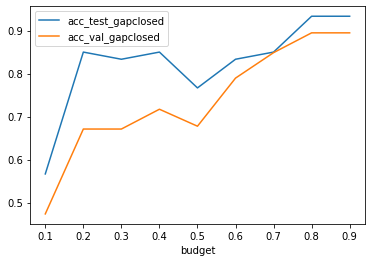

In [37]:
_ = result.plot(x="budget", y=["acc_test_gapclosed", "acc_val_gapclosed"])